## Exploratory Data Analysis

In [1]:
import sys
sys.version

'3.9.12 (main, Jun  1 2022, 06:36:29) \n[Clang 12.0.0 ]'

In [2]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [3]:
#Read the data as a data frame
data = pd.read_csv('dataset/insurance.csv', delimiter=',', header='infer')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Attribute Information:**

    age : age of primary beneficiary
    sex : insurance contractor gender, female, male
    bmi : Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
    children : Number of children covered by health insurance / Number of dependents
    smoker : Smoking
    region : the beneficiary's residential area in the US, northeast, southeast, southwest, northwest
    charges : Individual medical costs billed by health insurance.

## Task 3

In [4]:
# a. shape of the data
data.shape

(1338, 7)

In [5]:
# b. Data type of each attribute
# c. Checking the presence of missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# d. 5 point summary of numerical attributes
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/Users/jidhu/opt/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


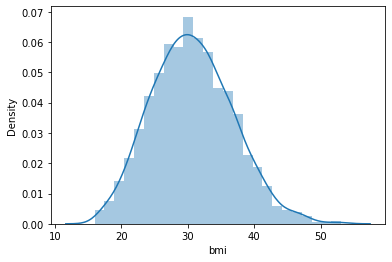

/Users/jidhu/opt/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


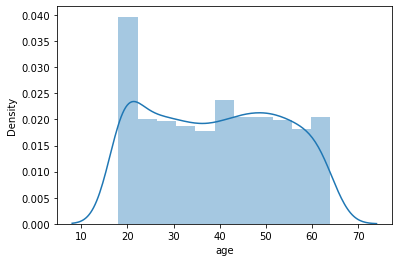

/Users/jidhu/opt/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


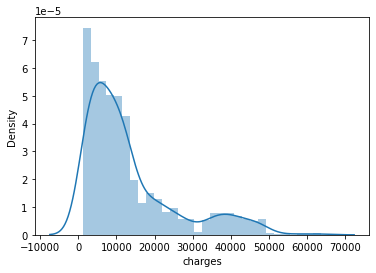

In [7]:
# e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns
for p in ['bmi', 'age', 'charges']:
    sns.distplot(data[p]) 
    plt.show()

In [8]:
# f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

for p in ['bmi', 'age', 'charges']:
    print('Skewness of \'{}\' distribution   \t : {}'.format(p, stats.skew(data[p])))

Skewness of 'bmi' distribution   	 : 0.28372857291709386
Skewness of 'age' distribution   	 : 0.055610083072599126
Skewness of 'charges' distribution   	 : 1.5141797118745743


/Users/jidhu/opt/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


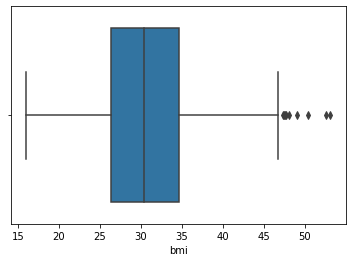

/Users/jidhu/opt/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


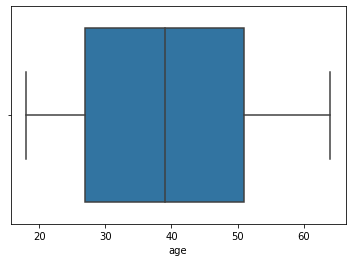

/Users/jidhu/opt/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


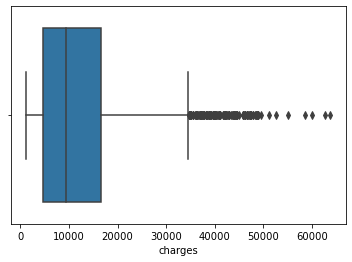

In [9]:
# g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns
for c in ['bmi', 'age', 'charges']:
    sns.boxplot(x=data[c], orient='v')
    plt.show()

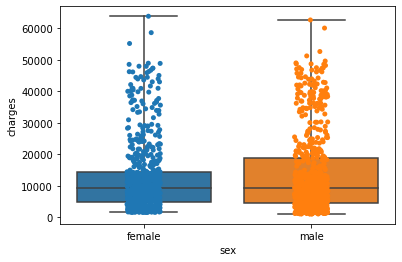

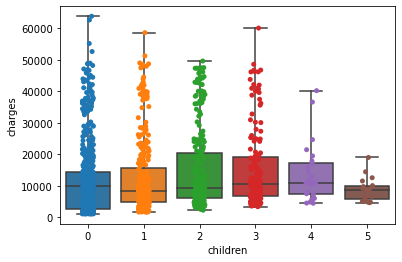

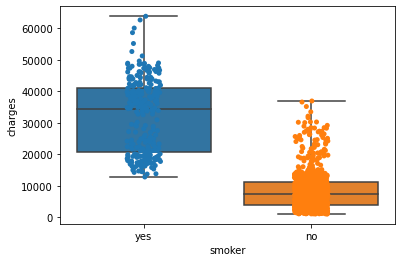

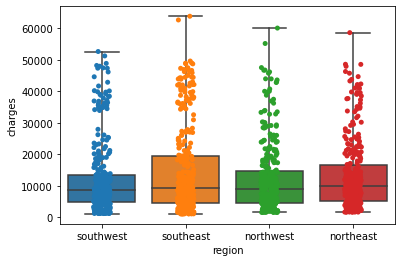

In [10]:
# h. Distribution of categorical columns (include children)

for c in ['sex', 'children', 'smoker', 'region']:
    sns.boxplot(x=c, y="charges", data=data, whis=np.inf)
    ax = sns.stripplot(x=c, y="charges", data=data, jitter=True)
    plt.show()

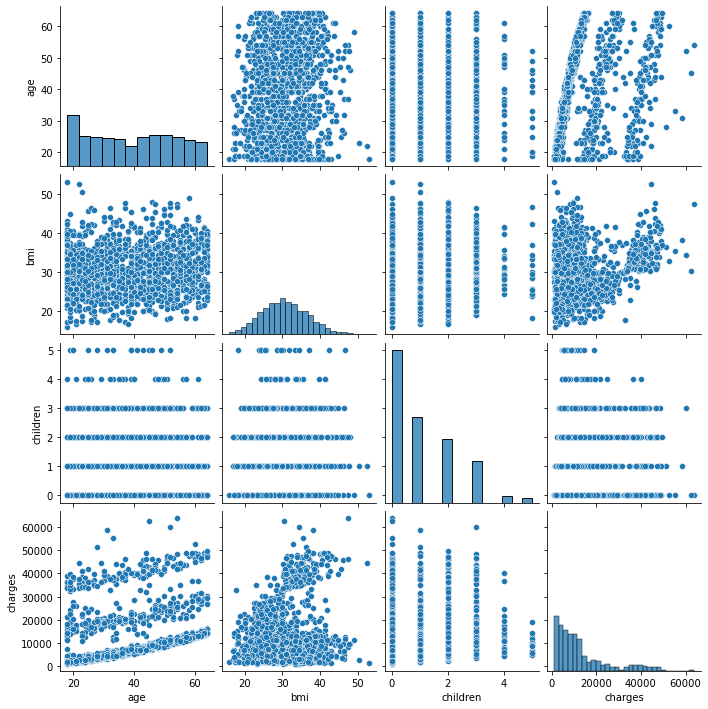

In [11]:
# i. Pair plot that includes all the columns of the dataframe
sns.pairplot(data)

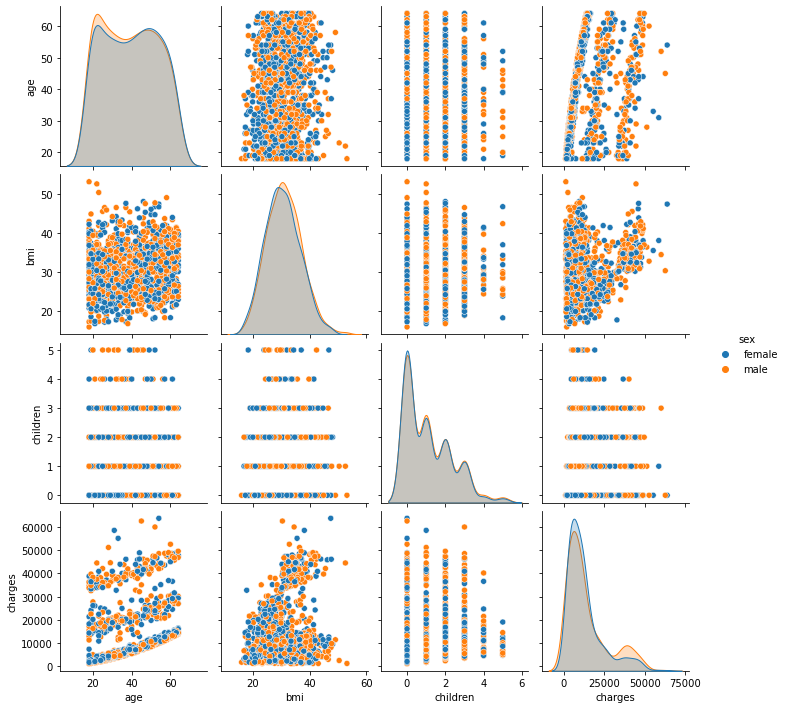

In [12]:
sns.pairplot(data, hue='sex')

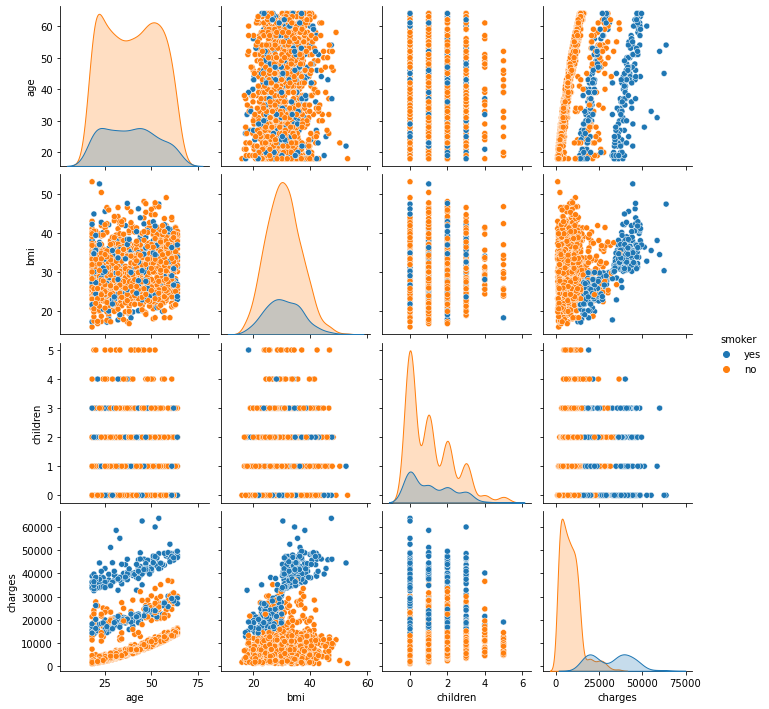

In [13]:
sns.pairplot(data, hue='smoker')

## Task 4

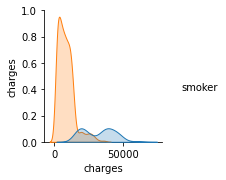

In [14]:
# a. Do charges of people who smoke differ significantly from the people who don't?
sns.pairplot(data[['charges','smoker']], hue='smoker') 
plt.show()

<AxesSubplot:xlabel='smoker', ylabel='charges'>

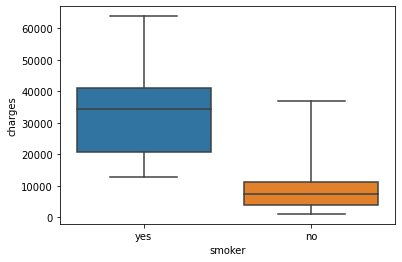

In [15]:
sns.boxplot(x='smoker', y="charges", data=data, whis=np.inf)

In [16]:
data.groupby('smoker').charges.mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

In [17]:
# Hypothesis testing
D1 = data[data['smoker']=='yes'].charges
D2 = data[data['smoker']=='no'].charges
if stats.ttest_ind(D1,D2).pvalue < 0.05:
    print('H1 is valid - charges of people who smoke differ significantly from the people who don\'t')
else:
    print('H0 is valid - charges of people who smoke don\'t differ significantly from the people who don\'t')

H1 is valid - charges of people who smoke differ significantly from the people who don't


**Answer:**

It is quite obvious from the box plot that the charges of the people who smoke is significantly higher than those who dont. Mean charges of the smoker is around four times that of the non smoker. This is proven with Hypothesis testing too.

In [18]:
# b. Does bmi of males differ significantly from that of females?

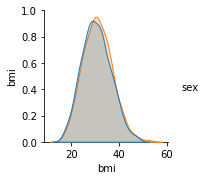

In [19]:
sns.pairplot(data[['bmi','sex']], hue='sex') 
plt.show()

<AxesSubplot:xlabel='sex', ylabel='bmi'>

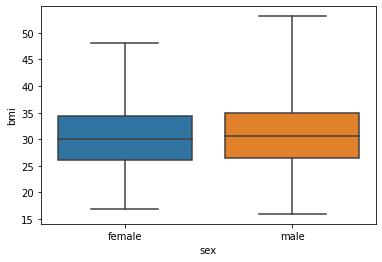

In [20]:
sns.boxplot(x='sex', y="bmi", data=data[['bmi','sex']], whis=np.inf)

<AxesSubplot:xlabel='sex', ylabel='bmi'>

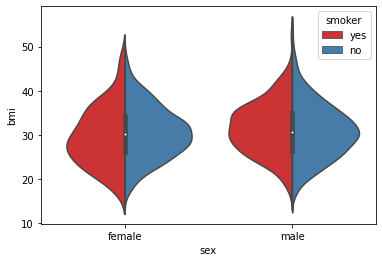

In [21]:
sns.violinplot(x="sex", y="bmi", data=data,hue='smoker',split=True,palette='Set1')

In [22]:
data.groupby(['sex','smoker']).bmi.mean()

sex     smoker
female  no        30.539525
        yes       29.608261
male    no        30.770580
        yes       31.504182
Name: bmi, dtype: float64

In [23]:
data.bmi.mean()

30.663396860986538

In [24]:
# Hypothesis testing
D1 = data[data['sex']=='male'].bmi
D2 = data[data['sex']=='female'].bmi
if stats.ttest_ind(D1,D2).pvalue < 0.05:
    print('H1 is valid - bmi of male differ significantly from that of female')
else:
    print('H0 is valid - bmi of male don\'t differ significantly from that of female')

H0 is valid - bmi of male don't differ significantly from that of female


**Answer:**

The distribution and box plots gives us the indication that the BMI is not depedant on gender. The probability distribution plots is similar. The violin plot shows that BMI of smokers and non smokers are also not significantly changing. The average is around 30 in all the cases. This was verified with hypothesis testing.

<AxesSubplot:xlabel='smoker', ylabel='count'>

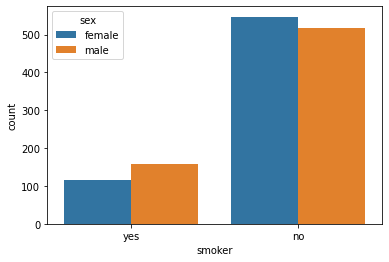

In [25]:
# c. Is the proportion of smokers significantly different in different genders?
sns.countplot(x='smoker', data=data, hue='sex')

In [26]:
data.groupby(['sex']).sex.count()

sex
female    662
male      676
Name: sex, dtype: int64

In [27]:
cnt = data.groupby(['sex', 'smoker']).sex.count()
cnt

sex     smoker
female  no        547
        yes       115
male    no        517
        yes       159
Name: sex, dtype: int64

In [28]:
cnt[1]*100/cnt[0] #female proportion

21.02376599634369

In [29]:
cnt[3]*100/cnt[2] #male proportion

30.754352030947775

In [30]:
cnt[3]-cnt[1]

44

**Answer:**

The proportion of the smokers differ with respect to gender. 20% of female are smokers and 31% of the male are smokers.
This is clear from the above analysis. 
Male smokers are higher in number. Also noted that the dataset the number of males is slightly higher than the females.


<AxesSubplot:xlabel='children', ylabel='count'>

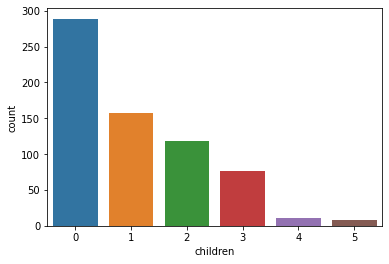

In [31]:
# d. Is the distribution of bmi across women with no children, one child and two children, the same?

sns.countplot(x='children', data=data[data['sex']=='female'])

The count of women without childen are higher. The count plot above shows that the number of childen increases the total count is lesser

In [32]:
data[data['sex']=='female'].head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692


mean = 30.361522491349486
    age     sex    bmi  children smoker     region      charges
0    19  female  27.90         0    yes  southwest  16884.92400
5    31  female  25.74         0     no  southeast   3756.62160
9    60  female  25.84         0     no  northwest  28923.13692
11   62  female  26.29         0    yes  southeast  27808.72510
13   56  female  39.82         0     no  southeast  11090.71780


/Users/jidhu/opt/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


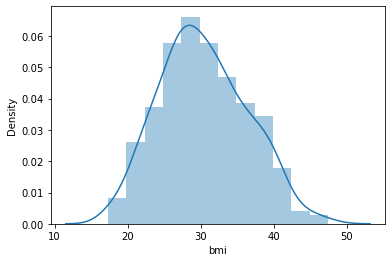

/Users/jidhu/opt/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mean = 30.05265822784811
    age     sex    bmi  children smoker     region     charges
6    46  female  33.44         1     no  southeast   8240.5896
16   52  female  30.78         1     no  northeast  10797.3362
21   30  female  32.40         1     no  southwest   4149.7360
23   34  female  31.92         1    yes  northeast  37701.8768
58   53  female  22.88         1    yes  southeast  23244.7902


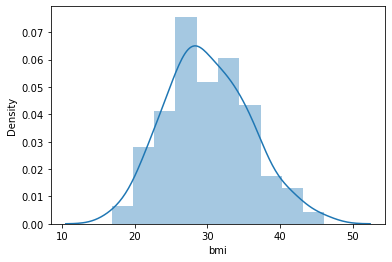

/Users/jidhu/opt/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mean = 30.64978991596637
    age     sex     bmi  children smoker     region      charges
27   55  female  32.775         2     no  northwest  12268.63225
41   31  female  36.630         2     no  southeast   4949.75870
43   37  female  30.800         2     no  southeast   6313.75900
46   18  female  38.665         2     no  northeast   3393.35635
51   21  female  33.630         2     no  northwest   3579.82870


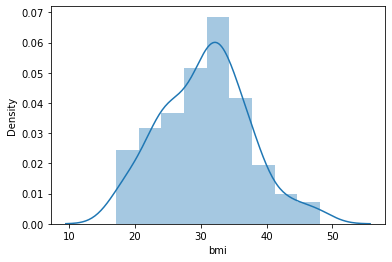

In [33]:
for i in [0,1,2]:
    sns.distplot(data[(data['sex']=='female') & (data['children']==i)].bmi) 
    print('mean =', data[(data['sex']=='female') & (data['children']==i)].bmi.mean())
    print(data[(data['sex']=='female') & (data['children']==i)].head())
    plt.show()


/Users/jidhu/opt/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jidhu/opt/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jidhu/opt/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

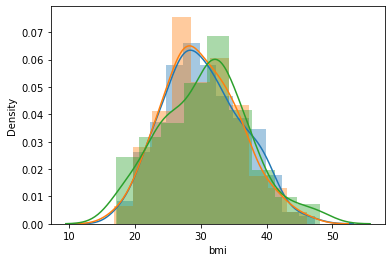

In [34]:
for i in [0,1,2]:
    sns.distplot(data[(data['sex']=='female') & (data['children']==i)].bmi) 
plt.show()


In [35]:
#computing ANOVA table
bmi=data.bmi
children=data[data['children']<=2].children
mymodel=ols('bmi ~ C(children)', data).fit()
anova_lm(mymodel)
#conclusion is that p-value ( PR(>F) column) is 0.88 which is >0.05 
#This means bmi donot change with children

,df,sum_sq,mean_sq,F,PR(>F)
C(children),5.0,65.112017,13.022403,0.349327,0.882868
Residual,1332.0,49655.088370,37.278595,NaN,NaN


**Answer:**

The mean of the bmi distribution across women with no childen, one child and two children are 30.
And the distributions are almost same. A slight variation is visible for two childen case.
So the ANOVA table is used and concluded that the BMI donot change so the three distributions are same.
